In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%pip install nb_black
%load_ext nb_black
%pip install jupyterlab-lsp



The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [114]:
airline = pd.read_csv(
    "C:/Users/91770/Downloads/Compressed/data.tar 2/data/data/airlines.csv"
)

<IPython.core.display.Javascript object>

In [115]:
airports = pd.read_csv(
    "C:/Users/91770/Downloads/Compressed/data.tar 2/data/data/airports.csv"
)

<IPython.core.display.Javascript object>

In [116]:
planes = pd.read_csv(
    "C:/Users/91770/Downloads/Compressed/data.tar 2/data/data/planes.csv"
)

<IPython.core.display.Javascript object>

In [117]:
weather = pd.read_csv(
    "C:/Users/91770/Downloads/Compressed/data.tar 2/data/data/weather.csv"
)

<IPython.core.display.Javascript object>

In [118]:
flights = pd.read_csv(
    "C:/Users/91770/Downloads/Compressed/data.tar 2/data/data/flights.csv"
)

<IPython.core.display.Javascript object>

# Total number of days flights table covered

In [119]:
flights1 = flights.copy()
flights1["year"] = flights1.year.astype(str)
flights1["month"] = flights1.month.astype(str)
flights1["day"] = flights1.day.astype(str)
flights1["date"] = flights1["year"] + flights1["month"] + flights1["day"]
flights1["date"] = pd.to_datetime(flights1.date, format="%Y%m%d")
cols = list(flights1.columns)
cols.insert(0, cols.pop(cols.index("date")))
flights1 = flights1.reindex(columns=cols)
flights1
flights1.drop(columns=["year", "month", "day"], inplace=True)
print((flights1.groupby(flights1.date)["date"].count()).count(), "days")
# Alternate_way:  print(flights.date.value_counts().count(), "days")


# There are 347 days that flights table covered

347 days


<IPython.core.display.Javascript object>

# Total departure cities (not airports) flights database covered

In [120]:
flights_database = pd.merge(
    left=airports, right=flights1, how="inner", left_on="IATA_CODE", right_on="origin"
)
print(flights_database.CITY.value_counts().count(), "Cities")

# Flights Database covered 2 departure cities or Origin cities

2 Cities


<IPython.core.display.Javascript object>

# Relationship between flights and planes tables?

In [210]:
planes_flights = pd.merge(
    left=planes, right=flights1, how="inner", left_on="tailnum", right_on="tailnum"
)
planes_flights1 = planes_flights.select_dtypes((["int64", "float64"]))
planes_flights1.corr()

,year,engines,seats,speed,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
year,1.000000,0.065796,-0.162941,0.120625,0.031214,0.015354,-0.027320,0.017672,0.045595,-0.123666,-0.121753,0.031427,-0.007777
engines,0.065796,1.000000,0.126912,0.570919,0.001152,0.003750,0.004967,0.001844,0.031050,-0.007813,-0.008344,0.000931,0.005914
seats,-0.162941,0.126912,1.000000,0.956287,-0.056294,-0.054632,-0.000831,-0.072463,-0.594148,0.522736,0.537983,-0.056228,0.001772
speed,0.120625,0.570919,0.956287,1.000000,-0.124697,-0.016679,-0.089974,-0.024750,-0.162255,-0.053661,-0.031929,-0.127771,0.085354
dep_time,0.031214,0.001152,-0.056294,-0.124697,1.000000,0.259906,0.635529,0.232119,0.037673,-0.011977,-0.010620,0.999321,-0.044812
dep_delay,0.015354,0.003750,-0.054632,-0.016679,0.259906,1.000000,0.020401,0.916874,0.065878,-0.027429,-0.026690,0.261566,-0.061446
arr_time,-0.027320,0.004967,-0.000831,-0.089974,0.635529,0.020401,1.000000,0.014037,0.024653,0.056093,0.049192,0.635121,-0.029069
arr_delay,0.017672,0.001844,-0.072463,-0.024750,0.232119,0.916874,0.014037,1.000000,0.071288,-0.038870,-0.064555,0.233747,-0.058845
flight,0.045595,0.031050,-0.594148,-0.162255,0.037673,0.065878,0.024653,0.071288,1.000000,-0.453203,-0.464365,0.038056,-0.012777
air_time,-0.123666,-0.007813,0.522736,-0.053661,-0.011977,-0.027429,0.056093,-0.038870,-0.453203,1.000000,0.991203,-0.011058,-0.024158


<IPython.core.display.Javascript object>

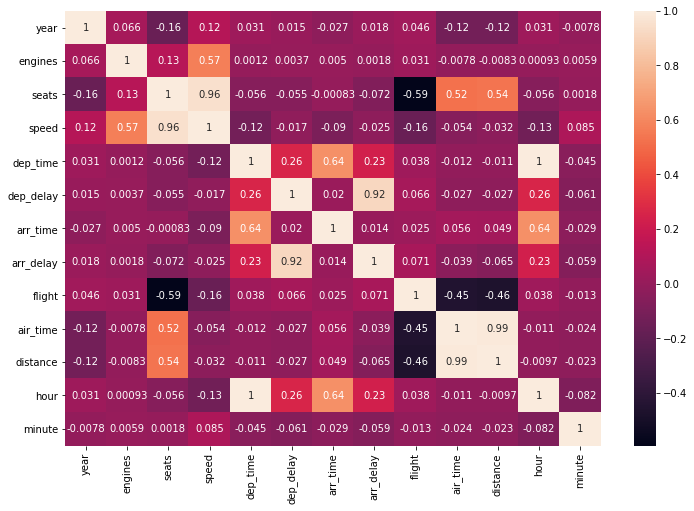

<IPython.core.display.Javascript object>

In [212]:
from pylab import rcParams

rcParams["figure.figsize"] = (
    12,
    8,
)  # for increasing the width of chart for better display

sns.heatmap(planes_flights.select_dtypes(["int64", "float64"]).corr(), annot=True)
plt.show()

### As we see in the heatmap and correlation table between variables of flights and planes tables, 
### here are the few points on the relation between two tables:

#### 'seats' is positively correlated with 'distance' which means larger planes are more likely used for long distance travels by manufacturer

#### 'engines' is negatively correlated with 'air_time' which means planes with more engines are taking less time to reach to destination

#### 'year' is negatively correlated with 'air_time' which means newer planes are taking less time to reach to destination

#### dep_delay is less with planes with higher speed

#### newer planes are used more for long distance travels as 'year' is negatively correlated with 'distance'

# Airplane manufacturer incurred the most delays in the analysis period

In [192]:
planes_flights = pd.merge(
    left=planes, right=flights1, how="inner", left_on="tailnum", right_on="tailnum"
)

planes_flights.dropna(
    axis=0, how="any", subset=["dep_delay", "manufacturer"], inplace=True
)
# removing rows with missing values

Manufacturer_delays_analysis = pd.DataFrame(
    planes_flights[planes_flights.dep_delay > 0]
    .groupby("manufacturer")["dep_delay"]
    .count()
)


Manufacturer_delays_analysis.sort_values(by="dep_delay", ascending=False).head(1)

# Airplane Manufacturer BOEING have incurred most delays

,dep_delay
manufacturer,
BOEING,37208


<IPython.core.display.Javascript object>

# Two most connected cities

In [350]:
Connected_Cities = pd.merge(
    left=airports, right=flights1, how="inner", left_on="IATA_CODE", right_on="dest"
)

Connected_Cities = Connected_Cities[["origin", "dest", "CITY"]]

analysis = Connected_Cities.groupby(["origin", "dest", "CITY"])["dest"].count()
analysis.sort_values(ascending=False).head(1)

# New York(JFK) is connected most to Los Angeles(LAX) as there are more flights running b/w these 2 then any other cities acc. to database

origin  dest  CITY       
JFK     LAX   Los Angeles    11262
Name: dest, dtype: int64

<IPython.core.display.Javascript object>